In [158]:
import numpy as np
import pandas as pd

df = pd.read_csv("donner_party1.csv")
df = df.dropna()
df.head()

,Survived,Name,Sex,Age,Marital Status
0,1,Patrick Breen,M,51.0,M
1,1,Margaret Breen,F,40.0,M
2,1,John Breen,M,14.0,S
3,1,Patrick Breen Jr.,M,9.0,S
4,1,Simon Preston Breen,M,8.0,S


([<matplotlib.axis.XTick at 0x1fd1864b670>,
 [Text(1, 0, 'Murio'), Text(2, 0, 'Sobrevivio')])

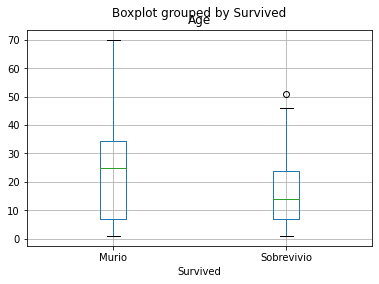

In [159]:
import numpy as np
import matplotlib.pyplot as plt

df.boxplot("Age","Survived")
plt.xticks([1, 2], ['Murio', 'Sobrevivio'])


Text(0.5, 1.0, 'Edad vs Sexo')

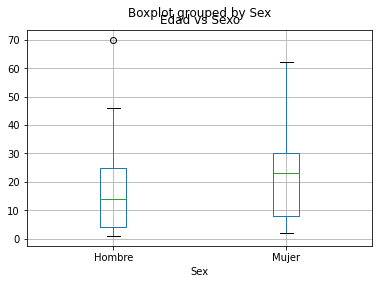

In [160]:
df.boxplot("Age","Sex")
plt.xticks([1, 2], ['Hombre', 'Mujer'])
plt.title('Edad vs Sexo')

In [161]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = 'Survived ~ Age + Sex'

# Instantiate a gamma family model with the default link function.
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                   86
Model:                            GLM   Df Residuals:                       83
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.154
Date:                Wed, 05 Oct 2022   Deviance:                       108.31
Time:                        12:39:06   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1072
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5069      0.504      2.991      0.0

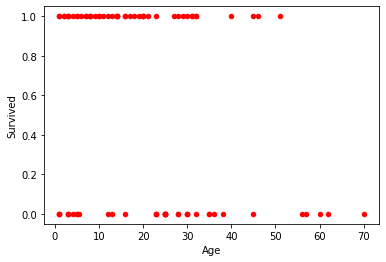

In [162]:
scatter_plot=df.plot.scatter(x='Age',y='Survived',c="Red")
scatter_plot.plot()
plt.show()

In [163]:
groups = df.groupby(df.Sex)

mujeres_df = groups.get_group('F')
hombres_df = groups.get_group('M')

In [164]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
# División de los datos en train y test
# ==============================================================================

X_h = hombres_df[['Age']]
y_h = hombres_df['Survived']

X_m = mujeres_df[['Age']]
y_m = mujeres_df['Survived']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
                                        X_h.values.reshape(-1,1),
                                        y_h.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
                                        X_m.values.reshape(-1,1),
                                        y_m.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [165]:
X_train_h = sm.add_constant(X_train_h, prepend=True)
modelo_h = sm.Logit(endog=y_train_h, exog=X_train_h,)
modelo_h = modelo_h.fit()
print(modelo_h.summary())

X_train_m = sm.add_constant(X_train_m, prepend=True)
modelo_m = sm.Logit(endog=y_train_m, exog=X_train_m,)
modelo_m = modelo_m.fit()
print(modelo_m.summary())

Optimization terminated successfully.
         Current function value: 0.620168
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   42
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                 0.09187
Time:                        12:39:06   Log-Likelihood:                -26.047
converged:                       True   LL-Null:                       -28.682
Covariance Type:            nonrobust   LLR p-value:                   0.02169
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7900      0.593      1.333      0.183      -0.372       1.952
x1            -0.0546      0.

In [166]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci_h = modelo_h.conf_int(alpha=0.05)
intervalos_ci_h = pd.DataFrame(intervalos_ci_h)
intervalos_ci_h.columns = ['2.5%', '97.5%']
print(intervalos_ci_h)

intervalos_ci_m = modelo_m.conf_int(alpha=0.05)
intervalos_ci_m = pd.DataFrame(intervalos_ci_m)
intervalos_ci_m.columns = ['2.5%', '97.5%']
print(intervalos_ci_m)

       2.5%     97.5%
0 -0.371513  1.951504
1 -0.107130 -0.002111
       2.5%     97.5%
0 -0.288466  2.355118
1 -0.065316  0.028428


In [167]:
# Predicción de probabilidades
# ==============================================================================
predicciones_h = modelo_h.predict(exog = X_train_h)
predicciones_m = modelo_m.predict(exog = X_train_m)

In [168]:
# Clasificación predicha
# ==============================================================================
clasificacion_h = np.where(predicciones_h<0.5, 0, 1)
clasificacion_m = np.where(predicciones_m<0.5, 0, 1)

In [169]:
# Predicciones en todo el rango de X
# ==============================================================================
# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X_h = np.linspace(
            start = min(hombres_df.Age),
            stop  = max(hombres_df.Age),
            num   = 200
         ).reshape(-1,1)

grid_X_h = sm.add_constant(grid_X_h, prepend=True)
predicciones_h = modelo_h.predict(exog = grid_X_h)

grid_X_m = np.linspace(
            start = min(mujeres_df.Age),
            stop  = max(mujeres_df.Age),
            num   = 200
         ).reshape(-1,1)

grid_X_m = sm.add_constant(grid_X_m, prepend=True)
predicciones_m = modelo_m.predict(exog = grid_X_m)

Text(0.5, 0, 'Nota matemáticas')

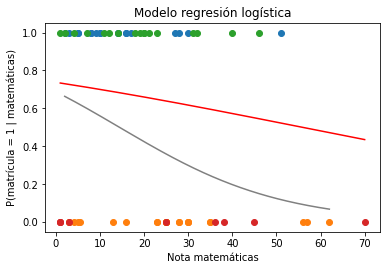

In [170]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train_h[(y_train_h == 1).flatten(), 1],
    y_train_h[(y_train_h == 1).flatten()].flatten()
)
ax.scatter(
    X_train_h[(y_train_h == 0).flatten(), 1],
    y_train_h[(y_train_h == 0).flatten()].flatten()
)
ax.plot(grid_X_h[:, 1], predicciones_h, color = "gray")

ax.scatter(
    X_train_m[(y_train_m == 1).flatten(), 1],
    y_train_m[(y_train_m == 1).flatten()].flatten()
)
ax.scatter(
    X_train_m[(y_train_m == 0).flatten(), 1],
    y_train_m[(y_train_m == 0).flatten()].flatten()
)
ax.plot(grid_X_m[:, 1], predicciones_m, color = "red")


ax.set_title("Modelo regresión logística")
ax.set_ylabel("P(matrícula = 1 | matemáticas)")
ax.set_xlabel("Nota matemáticas")